In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary
from torchviz import make_dot
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [2]:
from pythonlibs.torch_lib1 import *

print(README)

Common Library for PyTorch
Author: M. Akaishi


In [13]:
test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5)
])

train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=0, inplace=False)
])

In [14]:
data_dir = 'dog_wolf'

import os
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

classes = ['dog', 'wolf']

train_data = datasets.ImageFolder(train_dir, transform=train_transform)
train_data2 = datasets.ImageFolder(train_dir, transform=test_transform)
test_data = datasets.ImageFolder(test_dir, transform=test_transform)

In [15]:
print(len(train_data))
print(len(test_data))

40
10


In [16]:
batch_size = 5

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
train_loader2 = DataLoader(train_data2, batch_size=40, shuffle=False)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)
test_loader2 = DataLoader(test_data, batch_size=10, shuffle=True)

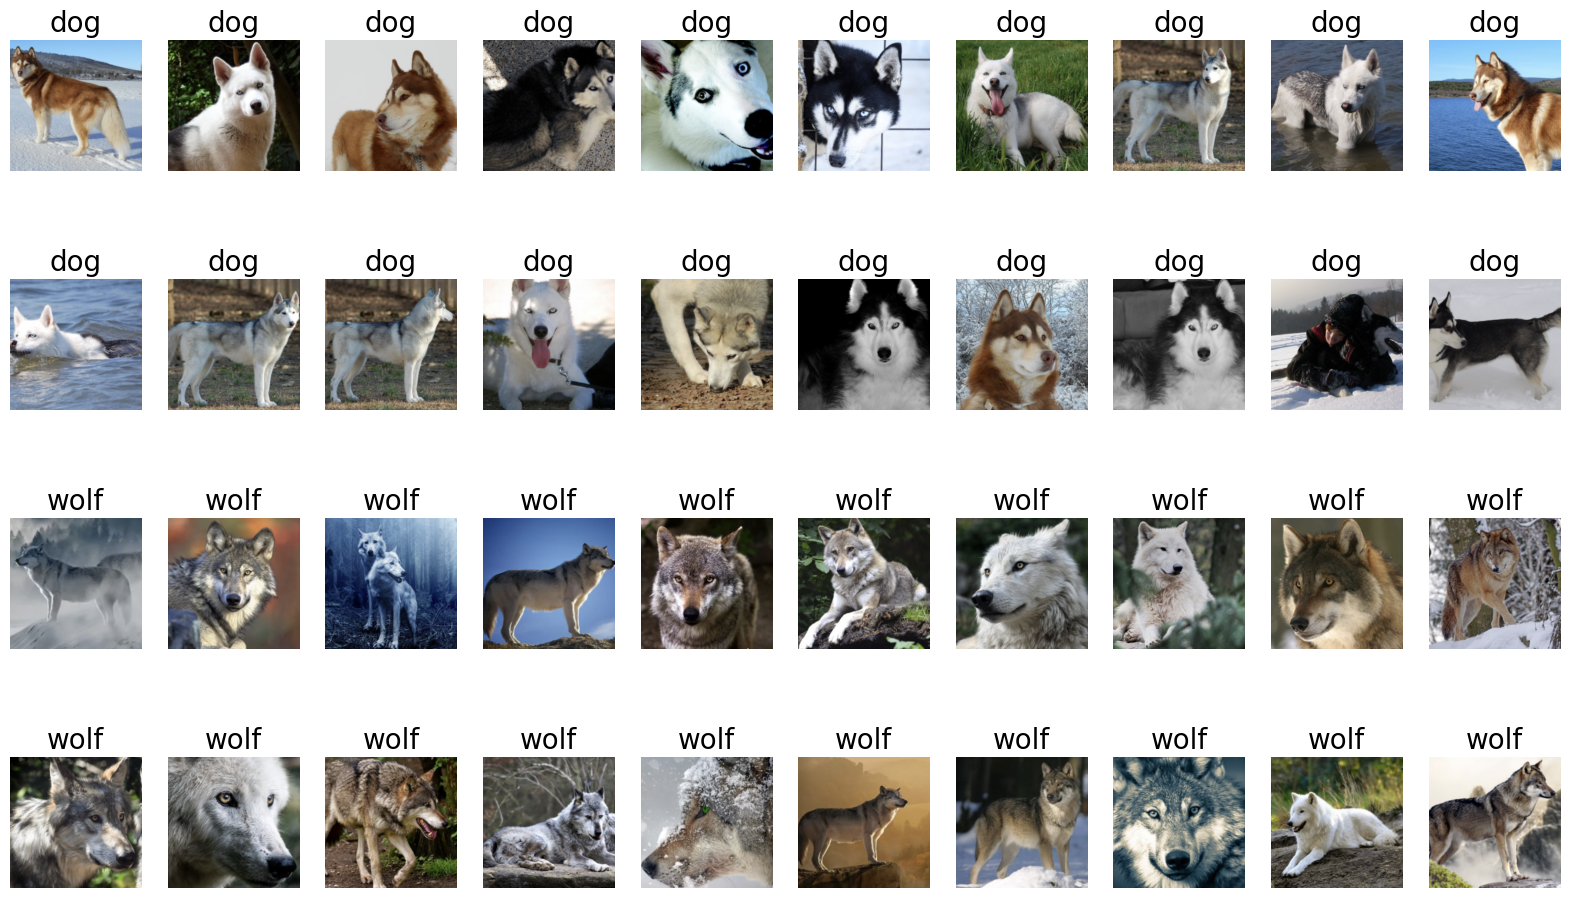

In [18]:
show_images_labels(train_loader2, classes, None, None)

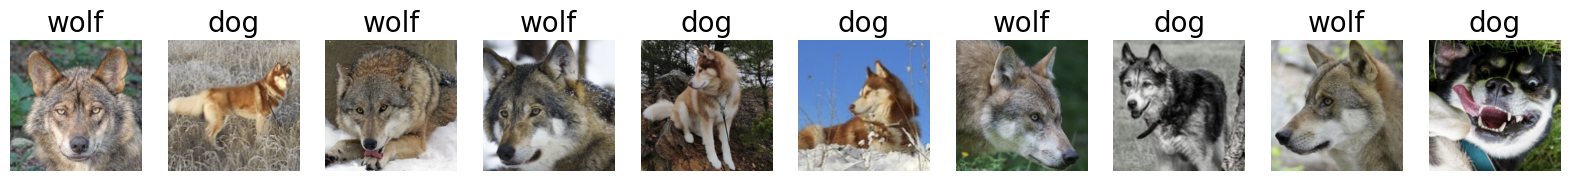

In [19]:
torch_seed()
show_images_labels(test_loader2, classes, None, None)

In [20]:
net = models.vgg19_bn(pretrained=True)

for param in net.parameters():
    param.requires_grad = False

torch_seed()

in_features = net.classifier[6].in_features
net.classifier[6] = nn.Linear(in_features, 2)

net.avgpool = nn.Identity()
net = net.to(device)

lr = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.classifier[6].parameters(), lr=lr, momentum=0.9)
history = np.zeros((0, 5))

c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [22]:
num_epochs = 20
history = fit(net, optimizer, criterion, num_epochs, 
          train_loader, test_loader, device, history)

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [1/20], loss: 0.06004 acc: 0.87500 val_loss: 0.05877, val_acc: 0.90000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [2/20], loss: 0.02826 acc: 1.00000 val_loss: 0.04301, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [3/20], loss: 0.04890 acc: 0.90000 val_loss: 0.04600, val_acc: 0.90000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [4/20], loss: 0.01607 acc: 1.00000 val_loss: 0.05979, val_acc: 0.80000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [5/20], loss: 0.02248 acc: 0.95000 val_loss: 0.05482, val_acc: 0.90000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [6/20], loss: 0.01868 acc: 0.97500 val_loss: 0.05781, val_acc: 0.80000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [7/20], loss: 0.02089 acc: 0.97500 val_loss: 0.05767, val_acc: 0.80000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [8/20], loss: 0.03929 acc: 0.92500 val_loss: 0.03596, val_acc: 0.90000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [9/20], loss: 0.01887 acc: 0.97500 val_loss: 0.04163, val_acc: 0.90000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [10/20], loss: 0.01619 acc: 0.97500 val_loss: 0.05428, val_acc: 0.90000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [11/20], loss: 0.01443 acc: 0.97500 val_loss: 0.04870, val_acc: 0.90000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [12/20], loss: 0.02525 acc: 0.97500 val_loss: 0.03462, val_acc: 0.90000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [13/20], loss: 0.01610 acc: 0.97500 val_loss: 0.02572, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [14/20], loss: 0.01544 acc: 0.95000 val_loss: 0.02426, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [15/20], loss: 0.01906 acc: 0.95000 val_loss: 0.04952, val_acc: 0.80000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [16/20], loss: 0.02179 acc: 0.97500 val_loss: 0.04588, val_acc: 0.80000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [17/20], loss: 0.02248 acc: 0.95000 val_loss: 0.03601, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [18/20], loss: 0.00737 acc: 1.00000 val_loss: 0.04850, val_acc: 0.80000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [19/20], loss: 0.04045 acc: 0.92500 val_loss: 0.06450, val_acc: 0.80000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [20/20], loss: 0.01861 acc: 0.95000 val_loss: 0.03813, val_acc: 0.90000


초기상태 : 손실 : 0.05877  정확도 : 0.90000
최종상태 : 손실 : 0.03813 정확도 : 0.90000


c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49552 (\N{HANGUL SYLLABLE SON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44257 (\N{HANGUL SYLLABLE GOG}) missing from current font.
  fig.

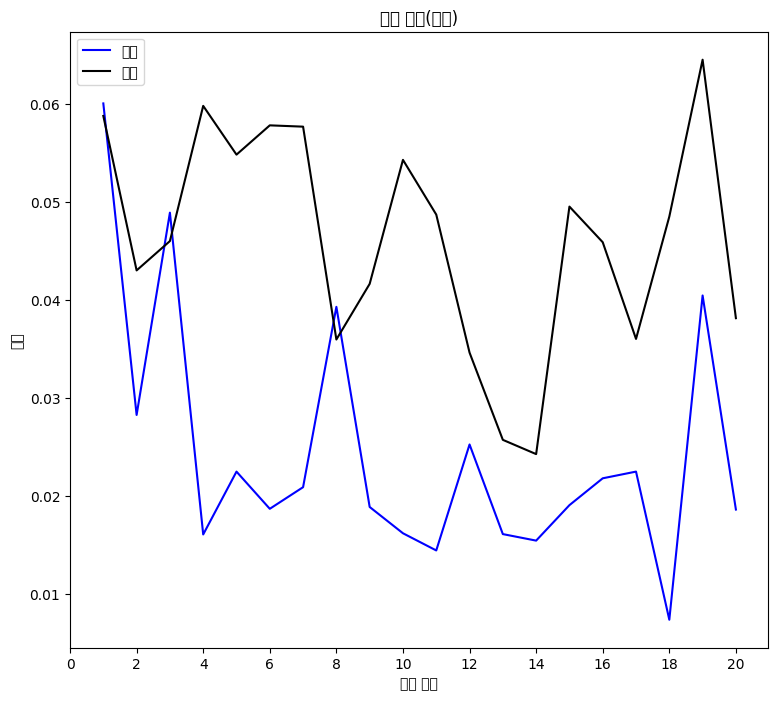

c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


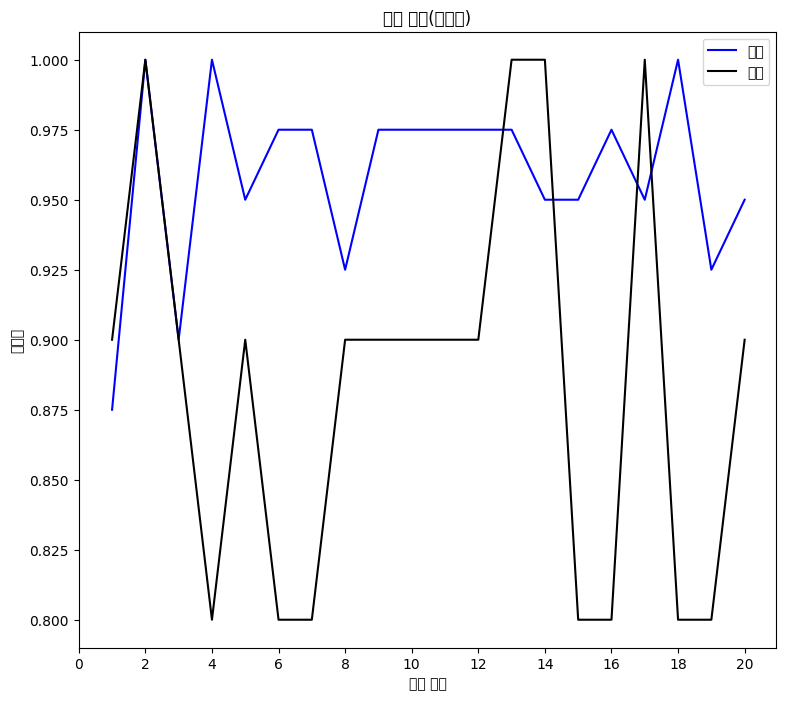

In [23]:
evaluate_history(history)

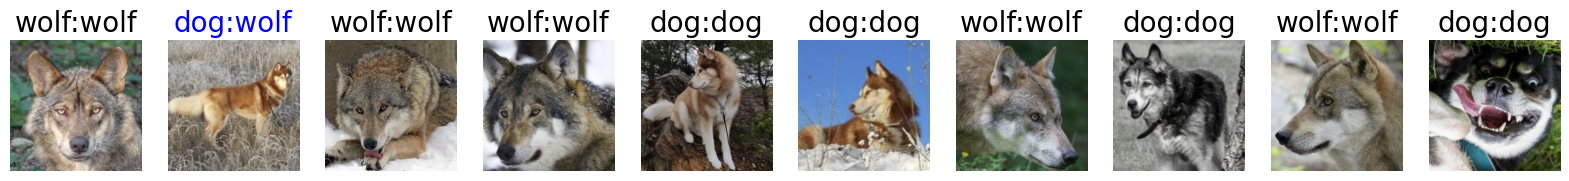

In [24]:
torch_seed()
show_images_labels(test_loader2, classes, net, device)